In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, stdev, median
import seaborn as sns


In [ ]:
#1257.4986072423399
#1253.6731382585315

In [121]:
prefix = '../../experiments/bc/big_ships_speed_10secs_scaled_NEW_APPROACH#8,16,32,16,8-steps7-seed5/steps7#8,16,32,16,8#seed5.csv'
title = 'BC_5epochs_256,128,64neurons'

runs = []
#runs.append(pd.read_csv(prefix.replace('ß', '5')))
#runs.append(pd.read_csv(prefix.replace('ß', '6')))
#runs.append(pd.read_csv(prefix.replace('ß', '7')))
#runs.append(pd.read_csv(prefix.replace('ß', '8')))
#runs.append(pd.read_csv(prefix.replace('ß', '9')))

runs.append(pd.read_csv(prefix))

perf_sum = runs[0]["performance"]
idx = 0
for run in runs:
    if idx != 0:
        perf_sum + run["performance"]
    run["mean_distance"] = 0
    for i in range(0, len(run["distances"])):
        # hacky way to convert strings that represent list back to true lists of floats
        run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
        run["mean_distance"][i] = mean(run["distances"][i])
    
    # # filter out extreme outliers
    # runs[idx] = run[run["mean_distance"] < 600]
    idx += 1

mean_perfs = perf_sum / len(runs)
tmp = runs[0]["mean_distance"]
[tmp := tmp + x["mean_distance"] for x in runs[1:]]
mean_dists = tmp / len(runs)
print(mean(mean_dists))
print(stdev(mean_dists))
print(median(mean_dists))

/tmp/ipykernel_13019/2733450055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
/tmp/ipykernel_13019/2733450055.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["mean_distance"][i] = mean(run["distances"][i])


2593.0720984759673
3027.183321352445
1071.5


In [1]:
sns.histplot(x=mean_dists)

NameError: name 'sns' is not defined

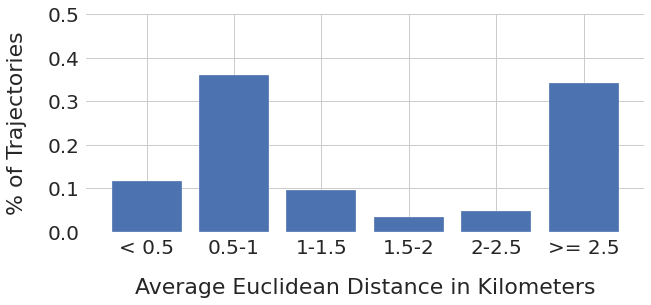

In [122]:
labels = ['< 0.5', '0.5-1' ,'1-1.5' , '1.5-2','2-2.5', '>= 2.5' ]
n_trajs = []

all = len(mean_dists)
n_trajs.append(len(mean_dists[mean_dists < 500]) / all)
n_trajs.append(len(mean_dists[(mean_dists >= 500) & (mean_dists <= 999)]) / all)
n_trajs.append(len(mean_dists[(mean_dists >= 1000) & (mean_dists <= 1499)]) / all)
n_trajs.append(len(mean_dists[(mean_dists >= 1500) & (mean_dists <= 1999)]) / all)
n_trajs.append(len(mean_dists[(mean_dists >= 2000) & (mean_dists <= 2499)]) / all)
n_trajs.append(len(mean_dists[mean_dists > 2499]) / all)

plt.figure(figsize=(10,4))
plt.style.use('seaborn')
sns.set_style("whitegrid")
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.bar(labels,n_trajs)
plt.ylabel("% of Trajectories", labelpad=20)
plt.xlabel("Average Euclidean Distance in Kilometers", labelpad=20)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
plt.ylim(0, 0.5)
#plt.draw()
#_NO_LABELS
plt.savefig(f'big_ships_speed_10secs_scaled_NEW_APPROACH#8,16,32,16,8-steps7.svg', format="svg", bbox_inches='tight')

In [32]:
print(mean(mean_dists))
print(stdev(mean_dists))
print(median(mean_dists))

178.04606407050136
147.96060081270227
147.6


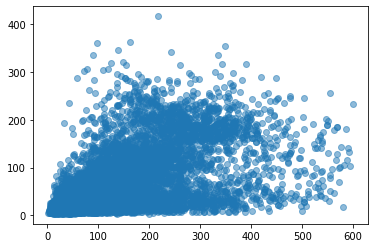

In [124]:
a = runs[0][(runs[0]["mean_distance"] < 150) & (runs[0]["ep_length"] < 150)]
plt.scatter(runs[0]["mean_distance"], runs[0]["ep_length"], alpha=0.5)
plt.show()

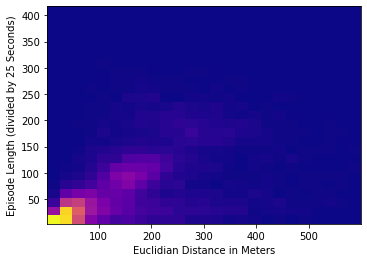

In [128]:
heatmap, xedges, yedges = np.histogram2d(runs[0]["mean_distance"], runs[0]["ep_length"],bins=25, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="plasma")
plt.xlabel("Euclidian Distance in Meters")
plt.ylabel("Episode Length (divided by 25 Seconds)")
plt.show()